In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data= pd.read_csv('/kaggle/input/titanic/train.csv')
test_data= pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
#Missing column/row drop function[test_data]
def MissingValue(train_data, Col_Dorp_thresold, Drop_raw_with_NaN = False):
    
    #for dropping column with NaN value
    Col_With_NaN =train_data.isnull().sum() /len(train_data)*100 #missing value percentage column vise
    Dropped_Columns = []
    for i in range(0,len(train_data.columns)):
        if Col_With_NaN[i] >= Col_Dorp_thresold:   #setting the threshold to drop columns%
            Dropped_Columns.append(train_data.columns[i])
    print(Dropped_Columns) #print the missing column name
    data = train_data.drop(Dropped_Columns,axis=1)
    
    #for dropping rows with NaN value
    if Drop_raw_with_NaN:
        Row_with_NaN =data.loc[pd.isnull(data).any(1), :].index
        print(Row_with_NaN)
        data = data.drop(Row_with_NaN,axis=0)
   
    return data

train_data=MissingValue(train_data,60,False) #train Data for missing Rows and Column
test_data=MissingValue(test_data,60,False) #For Test Data Drop Missing Columns
#test_data=test_data.fillna((test_data.mean()))
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace = True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace = True)

test_data['Age'].fillna(test_data['Age'].median(), inplace = True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace = True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace = True)


test_data.head()

#Wrangle data Drop column Ticket.Ticket Column have numerical+string Data.So drop the Column.Name and PassengerID is also not use of corealtion,so it is drpped.
train_data=train_data.drop(['Ticket','PassengerId'], axis=1)
test_data=test_data.drop(['Ticket'], axis=1)
#test_data.head()


['Cabin']
['Cabin']


In [4]:
print(train_data.shape)
print(test_data.shape)
train_data.head()


#convert categorical column to replace with numerical data

train_data['Sex']=train_data['Sex'].replace(regex='female', value=1)
train_data['Sex']=train_data['Sex'].replace(regex='male', value=0)

train_data['Embarked']=train_data['Embarked'].replace(regex='S', value=1)
train_data['Embarked']=train_data['Embarked'].replace(regex='C', value=0)
train_data['Embarked']=train_data['Embarked'].replace(regex='Q', value=2)

test_data['Sex']=test_data['Sex'].replace(regex='female', value=1)
test_data['Sex']=test_data['Sex'].replace(regex='male', value=0)

test_data['Embarked']=test_data['Embarked'].replace(regex='S', value=1)
test_data['Embarked']=test_data['Embarked'].replace(regex='C', value=0)
test_data['Embarked']=test_data['Embarked'].replace(regex='Q', value=2)



train_data.head(5)
#test_data.head(10)

     

(891, 9)
(418, 9)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1



Create new feature combining existing features:
We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp from our datasets.


In [5]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#We can create another feature called IsAlone.
train_data['IsAlone'] = 0
train_data.loc[train_data['FamilySize'] == 1, 'IsAlone'] = 1
#train_data[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

test_data['IsAlone'] = 0
test_data.loc[test_data['FamilySize'] == 1, 'IsAlone'] = 1

#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone
test_data = test_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
train_data = train_data.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)



In [6]:
#Let us create Age bands and determine correlations with Survived.

train_data['AgeBand']=pd.cut(train_data['Age'],5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age']

test_data['AgeBand']=pd.cut(test_data['Age'],5)
#test_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=True).mean().sort_values(by='AgeBand', ascending=True)

test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age']

train_data = train_data.drop(['AgeBand'], axis=1)
test_data = test_data.drop(['AgeBand'], axis=1)

train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
0,892,3,"Kelly, Mr. James",0,2.0,7.8292,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,7.0000,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,9.6875,2,1
3,895,3,"Wirz, Mr. Albert",0,1.0,8.6625,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,12.2875,1,0


In [7]:
#We can also create an artificial feature combining Pclass and Age.

train_data['Age*Class'] = train_data.Age * train_data.Pclass
train_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

test_data['Age*Class'] = test_data.Age * test_data.Pclass
test_data.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

train_data.head()
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2.0,7.8292,2,1,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2.0,7.0000,1,0,6.0
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,9.6875,2,1,6.0
3,895,3,"Wirz, Mr. Albert",0,1.0,8.6625,1,1,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,12.2875,1,0,3.0


In [8]:
#We decide to retain the new Title feature for model training.
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_data['Title'], train_data['Sex'])

#We can replace many titles with a more common name or classify them as Rare.

train_data['Title'] = train_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

test_data['Title'] = test_data['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')


#We can convert the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)

test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].fillna(0)

train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)
train_data.head()





,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,0,3,0,1.0,7.2500,1,0,3.0,1
1,1,1,1,2.0,71.2833,0,0,2.0,3
2,1,3,1,1.0,7.9250,1,1,3.0,2
3,1,1,1,2.0,53.1000,1,0,2.0,3
4,0,3,0,2.0,8.0500,1,1,6.0,1


In [9]:
#create the FareBand
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4)
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4)
train_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare'] = 3
train_data['Fare'] = train_data['Fare'].astype(int)

train_data = train_data.drop(['FareBand'], axis=1)

test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare'] = 3
test_data['Fare'] = test_data['Fare'].astype(int)

test_data = test_data.drop(['FareBand'], axis=1)


train_data.head()
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,IsAlone,Age*Class,Title
0,892,3,0,2.0,0,2,1,6.0,1
1,893,3,1,2.0,0,1,0,6.0,3
2,894,2,0,3.0,1,2,1,6.0,1
3,895,3,0,1.0,1,1,1,3.0,1
4,896,3,1,1.0,1,1,0,3.0,3


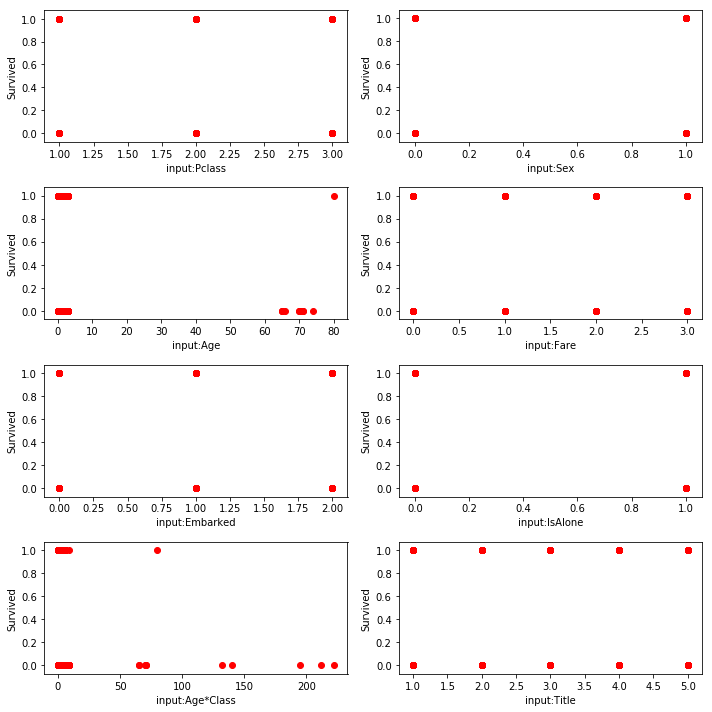

In [10]:
#correaltion with output Data wrt All Inputs Features
import seaborn as sns 
import matplotlib.pyplot as plt 

from scipy.stats import norm

correlation=train_data.corr()

#print(correlation)
plt.figure(figsize=(10,10))   
for i in range(1,len(train_data.columns)):
    plt.subplot(4,2,i)
    plt.scatter(train_data.iloc[:,i],train_data.iloc[:,:1],color='r')
    plt.xlabel('input:'+str(train_data.columns.values[i]))
    plt.ylabel('Survived')
    plt.tight_layout()
plt.show()


Test the Data in Models like :

In [11]:

X=train_data.drop("Survived", axis=1)
Y = train_data["Survived"]
xtest  = test_data.drop("PassengerId", axis=1).copy()
X.shape, Y.shape, xtest.shape


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(xtest)
acc_log = round(logreg.score(X, Y) * 100, 2)
acc_log


80.13

In [12]:
#Support Vector Machines

from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X, Y)
Y_pred = svc.predict(xtest)
acc_svc = round(svc.score(X, Y) * 100, 2)
acc_svc

78.23

In [13]:
#K nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, Y)
Y_pred = knn.predict(xtest)
acc_knn = round(knn.score(X, Y) * 100, 2)
acc_knn



84.51

In [14]:


# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X, Y)
Y_pred = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(X, Y) * 100, 2)
acc_gaussian




72.39

In [15]:


# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X, Y)
Y_pred = perceptron.predict(xtest)
acc_perceptron = round(perceptron.score(X, Y) * 100, 2)
acc_perceptron 

70.59

In [16]:


# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X, Y)
Y_pred = linear_svc.predict(xtest)
acc_linear_svc = round(linear_svc.score(X, Y) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


78.68

In [17]:
#Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X, Y)
Y_pred = sgd.predict(xtest)
acc_sgd = round(sgd.score(X, Y) * 100, 2)
acc_sgd

76.32

In [18]:


# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, Y)
Y_pred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(X, Y) * 100, 2)
acc_decision_tree

86.98

In [19]:


# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
Y_pred = random_forest.predict(xtest)
random_forest.score(X, Y)
acc_random_forest = round(random_forest.score(X, Y) * 100, 2)
acc_random_forest

86.98

In [20]:
#Model Evaluation

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)



,Model,Score
3,Random Forest,86.98
8,Decision Tree,86.98
1,KNN,84.51
2,Logistic Regression,80.13
7,Linear SVC,78.68
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.32
4,Naive Bayes,72.39
5,Perceptron,70.59


In [21]:
submission = pd.DataFrame({
    "PassengerId": test_data["PassengerId"],
    "Survived": Y_pred
    })
submission.to_csv('Submission_Titanic.csv',index = False)